# Step 3 - Xây dựng database cho bài toán

### Cẩu hỏi đặt ra
1. Làm thế nào để xác định khách hàng có lợi nhuận cao nhất?
2. Làm thế nào để xác định vùng nào có lợi nhuận cao nhất?
3. Làm thế nào một công ty có thể cung cấp sản phẩm tốt nhất và kiếm được nhiều tiền nhất?
4. Làm thế nào để phân khúc khách hàng có lợi nhuận?
5. Cần bao nhiêu ngân sách để có được khách hàng?
6. Bây giờ, chúng ta cần biết tuổi thọ của khách hàng này (custumer's lifetime span) => customer'saverage purchase amount * purchase frequency

### Thực hiện
- Một cách để ước tính tuổi thọ của khách hàng (customer's lifetime spa) là xem tỷ lệ bỏ đi trung bình hàng tháng (average monthly churn rate), là tỷ lệ phần trăm khách hàng bỏ đi hay chấm dứt mối quan hệ với doanh nghiệp. Có thể ước tính tuổi thọ của khách hàng bằng cách chia cho tỷ lệ bỏ đi (churn rate).
- Vì chúng ta thường không biết tuổi thọ của khách hàng (custumer's lifetime span), chúng ta sẽ cố
gắng ước tính CLV trong một khoảng thời gian nhất định. Điều này có thể được thực hiện bằng
cách ước tính CLV 12 tháng, 24 tháng hoặc cũng có thể là CLV 3 tháng của khách hàng.
Ngoài phương pháp đã nêu ở ví dụ trên, CLV cũng có thể được ước tính thông qua việc xây dựng
các mô hình dự đoán. Sử dụng thuật toán Machine Learning và dữ liệu lịch sử mua hàng của
khách hàng, chúng ta có thể xây dựng các mô hình Machine Learning dự đoán CLV của khách
hàng trong một khoảng thời gian nhất định.

## A. Import thư viện

In [1]:
# 1. Import library
import lib.step1ml_utilis_summaryPre_processing as pre
import lib.step2ml_utils_feature_selection as fea
import lib.step3ml_utils_model_design_testing_regression as reg
import lib.step4ml_utils_model_design_testing_explainability as exp
import lib.step5ml_utils_model_design_testing_visualize_models as vis
import lib.step6ml_utils_model_design_testing_geospatial_analysis as geo
import lib.step9ml_Text_Kmeans_Clustering as clu
import matplotlib
import matplotlib_inline
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## B. XÂY DỰNG DATABASE

### 1.1. Upload data

In [2]:
import pandas as pd
dir_file = "data_analysis/online_retail_data_analysis.csv"
df = pd.read_csv(dir_file)

In [3]:
df.columns

Index(['Unnamed: 0', 'fea_invoice_date', 'fea_year', 'fea_month', 'fea_day',
       'fea_weekofyear', 'fea_daily', 'fea_customer_id', 'fea_country',
       'fea_invoice_no', 'fea_type_invoice', 'fea_stock_code',
       'fea_type_stock_code', 'fea_description_1', 'fea_description_2',
       'fea_description_3', 'fea_quantity', 'fea_unit_price', 'fea_revenue'],
      dtype='object')

### 1.2. Data clean-up

In [4]:
df.loc[df['fea_quantity'] <= 0].shape

(10587, 19)

In [5]:
df.shape

(536641, 19)

In [6]:
df = df.loc[df['fea_quantity'] > 0]

### 1.3. Cần xóa bỏ những hồ sơ không có CustomerID
- Vì chúng ta sẽ xây dựng một mô hìnhMachine Learning để dự đoán giá trị khách hàng 3 tháng nên cần nhóm dữ liệu theo cột CustomerID
- Không có CustomerID, chúng ta không thể xây dựng mô hình


In [7]:
df[df['fea_customer_id']=='other'].shape

(133322, 19)

In [8]:
df[df['fea_customer_id']=='other'].shape[0]/df.shape[0]*100

25.343785999155983

In [9]:
df = df[df['fea_customer_id']!='other']
df

,Unnamed: 0,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_customer_id,fea_country,fea_invoice_no,fea_type_invoice,fea_stock_code,fea_type_stock_code,fea_description_1,fea_description_2,fea_description_3,fea_quantity,fea_unit_price,fea_revenue
0,0,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,sales,85123A,a,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart tlight holder,white hanging heart tlight holder,6.00,2.55,15.30
1,1,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,sales,71053,other,WHITE METAL LANTERN,white metal lantern,white metal lantern,6.00,3.39,20.34
2,2,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,sales,84406B,b,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger,cream cupid hearts coat hanger,8.00,2.75,22.00
3,3,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,sales,84029G,g,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle,knitted union flag hot water bottle,6.00,3.39,20.34
4,4,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,sales,84029E,e,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart,red woolly hottie white heart,6.00,3.39,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536636,541904,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,France,581587,sales,22613,other,PACK OF 20 SPACEBOY NAPKINS,pack of 2 spaceboy napkins,pack of spaceboy napkins,12.00,0.85,10.20
536637,541905,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,France,581587,sales,22899,other,CHILDREN'S APRON DOLLY GIRL,childrens apron dolly girl,childrens apron dolly girl,6.00,2.10,12.60
536638,541906,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,France,581587,sales,23254,other,CHILDRENS CUTLERY DOLLY GIRL,childrens cutlery dolly girl,childrens cutlery dolly girl,4.00,4.15,16.60
536639,541907,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,France,581587,sales,23255,other,CHILDRENS CUTLERY CIRCUS PARADE,childrens cutlery circus parade,childrens cutlery circus parade,4.00,4.15,16.60


#### Nhận xét
- Ta thấy tỉ lệ không có item khách hàng khá nhiều 135037 row chiếm tỉ trọng khá lớn khoảng 25% tổng số dòng


### 1.4. Handling incomplete data

- Bộ dữ liệu chứa các giao dịch trong khoảng thời gian từ ngày 01/10/2010 => 10/12/2011.
- Trong đó, tháng 12/2011 chưa đủ dữ liệu. Để xây dựng mô hình đúng cho dự đoán giá trị

In [10]:
print('Date Range: %s ~ %s' % (df['fea_invoice_date'].min(),df['fea_invoice_date'].max()))

Date Range: 2010-01-12 08:26:00 ~ 2011-12-10 17:19:00


In [11]:
# Số giao dịch tính từ 01/12/2011 đến 10/12/2011
df.loc[df['fea_invoice_date'] >= '2011-12-01'].shape

(9039, 19)

In [12]:
# Số giao dịch tính trước 01/12/2011
df = df.loc[df['fea_invoice_date'] < '2011-12-01']

In [13]:
df.shape

(383693, 19)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383693 entries, 0 to 536640
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           383693 non-null  int64  
 1   fea_invoice_date     383693 non-null  object 
 2   fea_year             383693 non-null  int64  
 3   fea_month            383693 non-null  int64  
 4   fea_day              383693 non-null  int64  
 5   fea_weekofyear       383693 non-null  int64  
 6   fea_daily            383693 non-null  int64  
 7   fea_customer_id      383693 non-null  object 
 8   fea_country          383693 non-null  object 
 9   fea_invoice_no       383693 non-null  object 
 10  fea_type_invoice     383693 non-null  object 
 11  fea_stock_code       383693 non-null  object 
 12  fea_type_stock_code  383693 non-null  object 
 13  fea_description_1    383693 non-null  object 
 14  fea_description_2    383693 non-null  object 
 15  fea_description_3

### 1.5. Nhóm dữ liệu theo fea_customer_id và fea_invoice_no
- Nhóm dữ liệu theo CustomerID và InvoiceNo

In [15]:
orders_df = df.groupby(['fea_country','fea_customer_id', 'fea_invoice_no']).agg({
'fea_revenue': sum,
'fea_invoice_date': max
})

In [16]:
orders_df

fea_revenue     fea_invoice_date
fea_country fea_customer_id fea_invoice_no                                  
Australia   12386.0         537676               258.90  2010-08-12 09:53:00
                            540280               143.00  2011-06-01 12:37:00
            12388.0         541271               431.30  2011-01-17 11:12:00
                            543357               124.05  2011-07-02 13:59:00
                            546135               210.90  2011-09-03 15:47:00
...                                                 ...                  ...
Unspecified 12743.0         561661               195.33  2011-07-28 16:21:00
            14265.0         559929               252.05  2011-07-14 09:10:00
                            564051               278.13  2011-08-22 13:32:00
            16320.0         552695               852.68  2011-10-05 15:31:00
                            557499               185.78  2011-06-20 15:25:00

[18072 rows x 2 columns]

## C. Data Analysis
- Để tính toán CLV, cần biết purchase_frequency (tần suất mua hàng), purchase_duration (thời gian mua hàng), avg (tiền mua hàng trung bình), count (số lần mua hàng) của khách hàng.

### 1.1. Xây dựng hàm 

In [17]:
def groupby_mean(x):
    return x.mean()
def groupby_count(x):
    return x.count()
def purchase_duration(x):
    return (x.max() - x.min()).days
def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()
groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

### 1.2. Change date

In [18]:
lst_date = 'fea_invoice_date'
pre.changeToAstype_date(df=orders_df, feature_date=lst_date)

fea_revenue    fea_invoice_date
fea_country fea_customer_id fea_invoice_no                                 
Australia   12386.0         537676               258.90 2010-08-12 09:53:00
                            540280               143.00 2011-06-01 12:37:00
            12388.0         541271               431.30 2011-01-17 11:12:00
                            543357               124.05 2011-07-02 13:59:00
                            546135               210.90 2011-09-03 15:47:00
...                                                 ...                 ...
Unspecified 12743.0         561661               195.33 2011-07-28 16:21:00
            14265.0         559929               252.05 2011-07-14 09:10:00
                            564051               278.13 2011-08-22 13:32:00
            16320.0         552695               852.68 2011-10-05 15:31:00
                            557499               185.78 2011-06-20 15:25:00

[18072 rows x 2 columns]

In [19]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 18072 entries, ('Australia', '12386.0', '537676') to ('Unspecified', '16320.0', '557499')
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fea_revenue       18072 non-null  float64       
 1   fea_invoice_date  18072 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 545.9+ KB


### 1.3. Groupby xây dựng order

In [20]:
summary_df = orders_df.reset_index().groupby(['fea_country','fea_customer_id']).agg({
    'fea_revenue': [min, max, sum, groupby_mean, groupby_count],
    'fea_invoice_date': [min, max, purchase_duration, avg_frequency]
})

In [21]:
summary_df

fea_revenue                                   \
                                       min      max       sum     avg count   
fea_country    fea_customer_id                                                
Australia      12386.0              143.00   258.90    401.90  200.95  2.00   
               12388.0              124.05   902.09   2780.66  463.44  6.00   
               12393.0              177.00   521.50   1582.60  395.65  4.00   
               12415.0               61.20 22775.93 124914.53 5948.31 21.00   
               12422.0              147.70   238.50    386.20  193.10  2.00   
...                                    ...      ...       ...     ...   ...   
United Kingdom 18287.0               70.68   765.28    835.96  417.98  2.00   
Unspecified    12363.0              252.90   299.10    552.00  276.00  2.00   
               12743.0              195.33   344.80    540.13  270.06  2.00   
               14265.0              252.05   278.13    530.18  265.09  2.00   
               16320.0              185.78   852.68   1038.46  519.23  2.00   

                                  fea_invoice_date                      \
                                               min                 max   
fea_country    fea_customer_id                                           
Australia      12386.0         2010-08-12 09:53:00 2011-06-01 12:37:00   
               12388.0         2011-01-17 11:12:00 2011-11-24 12:30:00   
               12393.0         2011-01-14 11:36:00 2011-11-01 09:47:00   
               12415.0         2011-01-04 14:28:00 2011-11-15 14:22:00   
               12422.0         2011-01-19 09:13:00 2011-05-09 09:48:00   
...                                            ...                 ...   
United Kingdom 18287.0         2011-05-22 10:39:00 2011-10-28 09:29:00   
Unspecified    12363.0         2011-08-22 10:18:00 2011-11-04 13:29:00   
               12743.0         2011-07-28 16:06:00 2011-07-28 16:21:00   
               14265.0         2011-07-14 09:10:00 2011-08-22 13:32:00   
               16320.0         2011-06-20 15:25:00 2011-10-05 15:31:00   

                                                                     
                               purchase_duration purchase_frequency  
fea_country    fea_customer_id                                       
Australia      12386.0                       293             146.50  
               12388.0                       311              51.83  
               12393.0                       290              72.50  
               12415.0                       314              14.95  
               12422.0                       110              55.00  
...                                          ...                ...  
United Kingdom 18287.0                       158              79.00  
Unspecified    12363.0                        74              37.00  
               12743.0                         0               0.00  
               14265.0                        39              19.50  
               16320.0                       107              53.50  

[4316 rows x 9 columns]

### 1.4. Change dữ liệu

In [22]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [23]:
summary_df

fea_revenue_min  fea_revenue_max  \
fea_country    fea_customer_id                                     
Australia      12386.0                   143.00           258.90   
               12388.0                   124.05           902.09   
               12393.0                   177.00           521.50   
               12415.0                    61.20         22775.93   
               12422.0                   147.70           238.50   
...                                         ...              ...   
United Kingdom 18287.0                    70.68           765.28   
Unspecified    12363.0                   252.90           299.10   
               12743.0                   195.33           344.80   
               14265.0                   252.05           278.13   
               16320.0                   185.78           852.68   

                                fea_revenue_sum  fea_revenue_avg  \
fea_country    fea_customer_id                                     
Australia      12386.0                   401.90           200.95   
               12388.0                  2780.66           463.44   
               12393.0                  1582.60           395.65   
               12415.0                124914.53          5948.31   
               12422.0                   386.20           193.10   
...                                         ...              ...   
United Kingdom 18287.0                   835.96           417.98   
Unspecified    12363.0                   552.00           276.00   
               12743.0                   540.13           270.06   
               14265.0                   530.18           265.09   
               16320.0                  1038.46           519.23   

                                fea_revenue_count fea_invoice_date_min  \
fea_country    fea_customer_id                                           
Australia      12386.0                       2.00  2010-08-12 09:53:00   
               12388.0                       6.00  2011-01-17 11:12:00   
               12393.0                       4.00  2011-01-14 11:36:00   
               12415.0                      21.00  2011-01-04 14:28:00   
               12422.0                       2.00  2011-01-19 09:13:00   
...                                           ...                  ...   
United Kingdom 18287.0                       2.00  2011-05-22 10:39:00   
Unspecified    12363.0                       2.00  2011-08-22 10:18:00   
               12743.0                       2.00  2011-07-28 16:06:00   
               14265.0                       2.00  2011-07-14 09:10:00   
               16320.0                       2.00  2011-06-20 15:25:00   

                               fea_invoice_date_max  \
fea_country    fea_customer_id                        
Australia      12386.0          2011-06-01 12:37:00   
               12388.0          2011-11-24 12:30:00   
               12393.0          2011-11-01 09:47:00   
               12415.0          2011-11-15 14:22:00   
               12422.0          2011-05-09 09:48:00   
...                                             ...   
United Kingdom 18287.0          2011-10-28 09:29:00   
Unspecified    12363.0          2011-11-04 13:29:00   
               12743.0          2011-07-28 16:21:00   
               14265.0          2011-08-22 13:32:00   
               16320.0          2011-10-05 15:31:00   

                                fea_invoice_date_purchase_duration  \
fea_country    fea_customer_id                                       
Australia      12386.0                                         293   
               12388.0                                         311   
               12393.0                                         290   
               12415.0                                         314   
               12422.0                                         110   
...                                                            ...   
United Kingdom 18287.0 

### 1.5. Data analysis

In [24]:
summary_df.describe()

,fea_revenue_min,fea_revenue_max,fea_revenue_sum,fea_revenue_avg,fea_revenue_count,fea_invoice_date_purchase_duration,fea_invoice_date_purchase_frequency
count,4316.00,4316.00,4316.00,4316.00,4316.00,4316.00,4316.00
mean,263.74,649.38,2011.71,416.76,4.19,153.94,35.49
std,1218.97,3094.02,8832.81,1800.12,7.54,173.55,44.24
min,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,92.44,219.37,304.17,177.34,1.00,0.00,0.00
50%,168.76,364.55,657.19,291.23,2.00,110.00,24.75
75%,308.30,613.03,1624.65,427.58,5.00,260.00,53.76
max,77183.60,168469.60,262901.96,84236.25,207.00,687.00,343.50


In [25]:
summary_df = summary_df.loc[summary_df['fea_invoice_date_purchase_duration'] > 0]

In [26]:
summary_df.shape

(2746, 9)

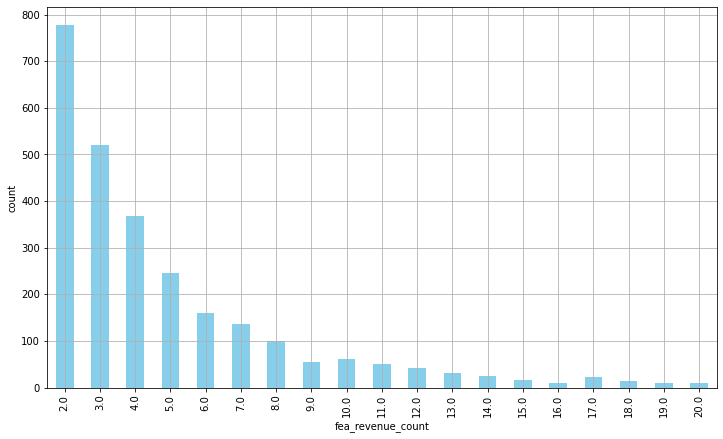

In [27]:
import matplotlib.pyplot as plt
ax = summary_df.groupby('fea_revenue_count').count()['fea_revenue_avg'][:20].plot(
kind='bar',
color='skyblue',
figsize=(12,7),
grid=True
)
ax.set_ylabel('count')
plt.show()

#### Nhận xét
- Biểu đồ cho thấy phần lớn khách hàng đã thực hiện 9 lần mua hoặc ít hơn trong lịch sử.

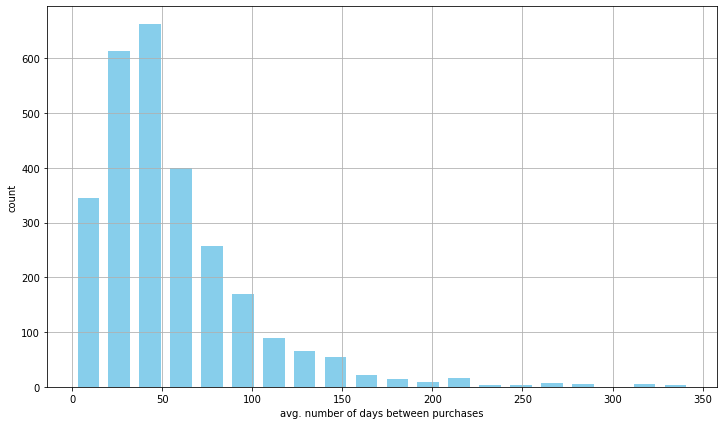

In [28]:
ax = summary_df['fea_invoice_date_purchase_frequency'].hist(
bins=20,
color='skyblue',
rwidth=0.7,
figsize=(12,7)
)
ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')
plt.show()

#### Nhận xét:
- Biểu đồ cho chúng ta cái nhìn tổng thể về tần suất khách hàng lặp lại mua hàng trong lịch sử.
- Từ đó có thể thấy phần lớn khách hàng lặp lại việc mua hàng sau 20 đến 50 ngày.

## D. XUẤT DỮ LIỆU

### 1.1. Xuất dữ liệu

In [29]:
summary_df.to_csv('data_analysis/online_retail_data_analysis_final.csv')